In [2]:
## Importation des blibliothéques 

In [4]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub 

2024-03-09 22:58:48.912351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 22:58:48.912529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 22:58:49.092758: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Collection

In [6]:
normal_path = "/kaggle/input/Brain_Data_Organised/Normal"
stroke_path = "/kaggle/input/Brain_Data_Organised/Stroke"

In [7]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [8]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


## Image Data Preprocessing 

In [14]:
normal_path = "/kaggle/input/Brain_Data_Organised/Normal"
stroke_path = "/kaggle/input/Brain_Data_Organised/Stroke"

data = []

for img_file in normal_folder:
    image = Image.open("/kaggle/input/Brain_Data_Organised/Normal/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
for img_file in stroke_folder:
    image = Image.open("/kaggle/input/Brain_Data_Organised/Stroke/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [15]:
len(data)

2501

In [19]:
data[0].shape

(224, 224, 3)

In [11]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## Class Labels

In [20]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)

In [21]:
Target_label = normal_label + stroke_label

In [22]:
len(Target_label)

2501

## Convert Image data and target labels into array

In [23]:
x = np.array(data)
y = np.array(Target_label)

In [24]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [25]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Split The Data for training and testing purpose

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


## Scale The Data

In [27]:
x_train_s = x_train/255
x_test_s = x_test/255

## Image Data Visualization

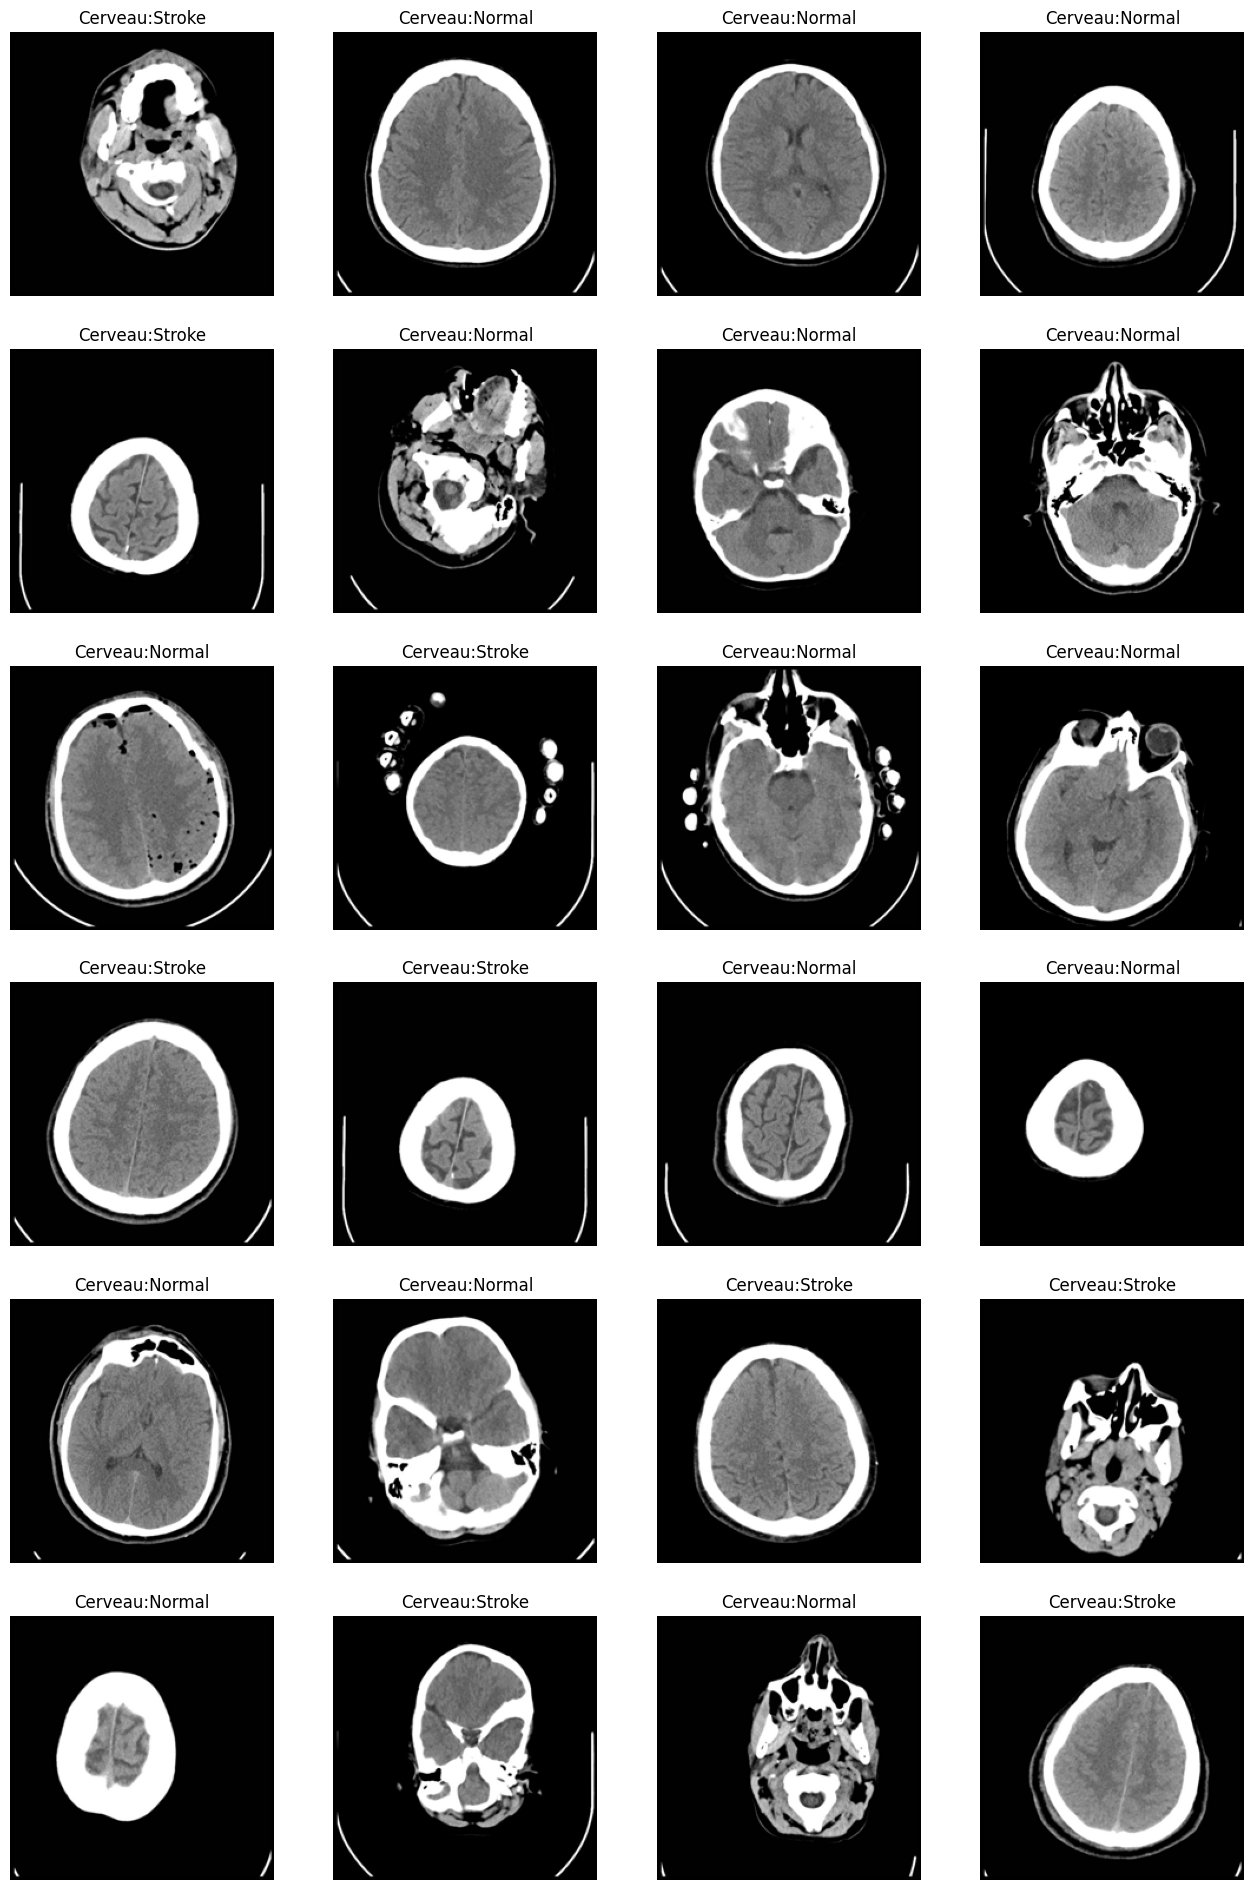

In [28]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Cerveau:{class_labels[y_train[i]]}")
    plt.axis("off")

## Create Model Using CNN

In [30]:
model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 80)   │        72,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 80)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 64)     │        46,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │    21,632,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,004,525 (83.94 MB)

 Trainable params: 22,004,525 (83.94 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(x_train_s,y_train,
         epochs=10, validation_data=(x_test_s,y_test))

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 347s 5s/step - accuracy: 0.5934 - loss: 0.7127 - val_accuracy: 0.8048 - val_loss: 0.4371
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 379s 5s/step - accuracy: 0.8112 - loss: 0.3973 - val_accuracy: 0.9004 - val_loss: 0.2028
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 382s 5s/step - accuracy: 0.9560 - loss: 0.1190 - val_accuracy: 0.9801 - val_loss: 0.0703
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 344s 5s/step - accuracy: 0.9820 - loss: 0.0517 - val_accuracy: 0.9841 - val_loss: 0.0715
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 377s 5s/step - accuracy: 0.9897 - loss: 0.0279 - val_accuracy: 0.9801 - val_loss: 0.1214
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 339s 5s/step - accuracy: 0.9899 - loss: 0.0305 - val_accuracy: 0.9681 - val_loss: 0.0728
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 379s 5s/step - accuracy: 0.9920 - loss: 0.0226 - val_accuracy: 0.9841 - val_loss: 0.0589
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 337s 5s/step - accuracy: 0.9941 - loss: 0.0202 - val_accuracy: 0.9880 - v

## Model Evaluation on Test and Train Data

In [23]:
loss, acc = model.evaluate(x_test_s,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss, acc = model.evaluate(x_train_s,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 989ms/step - accuracy: 0.9727 - loss: 0.0732
Loss on Test Data: 0.07421219348907471
Accuracy on Test Data: 0.9681274890899658
71/71 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9993 - loss: 8.9777e-04
Loss on Train Data: 0.001241226214915514
Accuracy on Train Data: 0.9991111159324646


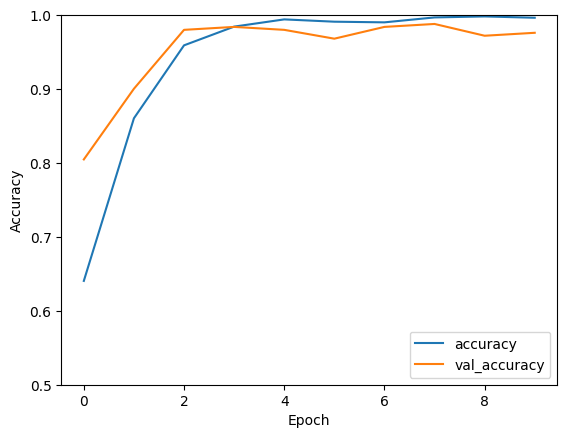

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


## Predictions on Test Image Data

In [35]:
y_pred_test = model.predict(x_test_s)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


In [36]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [0 0 0 0 1 0 0 0 1 0]
Predicted Label: [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


## Metrics Evaluation On Test Data

In [37]:
print("-----Metrics Evaluation On Test Data -----")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test_label))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_test_label))

-----Metrics Evaluation On Test Data -----

Confusion Matrix:
 [[161   2]
 [  4  84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       163
           1       0.98      0.95      0.97        88

    accuracy                           0.98       251
   macro avg       0.98      0.97      0.97       251
weighted avg       0.98      0.98      0.98       251



## ROC - Curve

In [38]:

from sklearn.metrics import roc_curve, precision_recall_curve, auc

y_prob = model.predict(x_test_s)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

# Compute ROC curve and ROC area
roc_auc = auc(fpr, tpr)
print(f"ROC - Area :{roc_auc}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
ROC - Area :0.9985359732292248


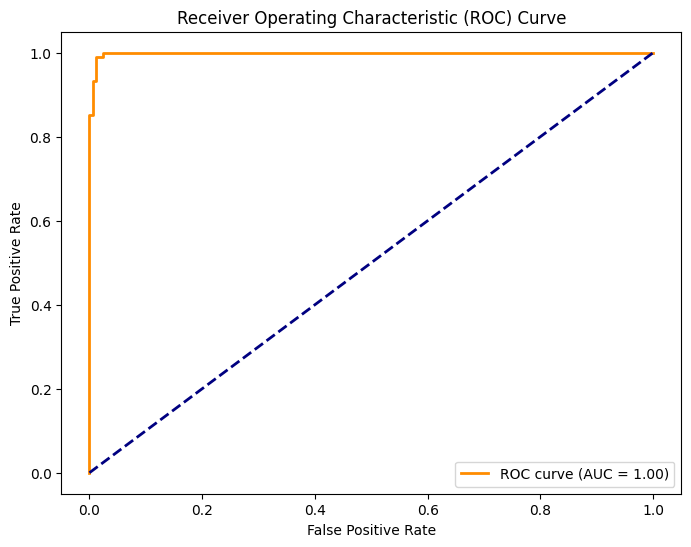

In [39]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## PR Curve

In [40]:
y_prob = model.predict(x_test_s)

precision, recall, threshold = precision_recall_curve(y_test, y_prob)

# Compute ROC curve and ROC area
pr_auc = auc(recall,precision)
print(f"PR - Area :{pr_auc}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
PR - Area :0.9971878582734147


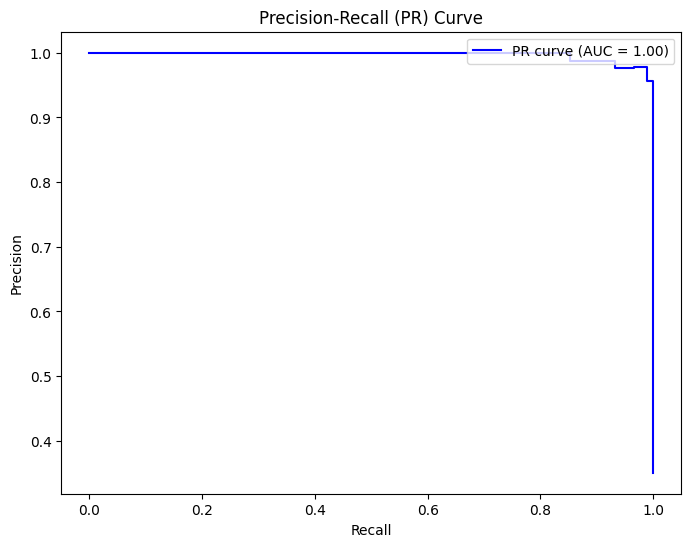

In [41]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='upper right')
plt.show()

## Image Predictions on Test Data

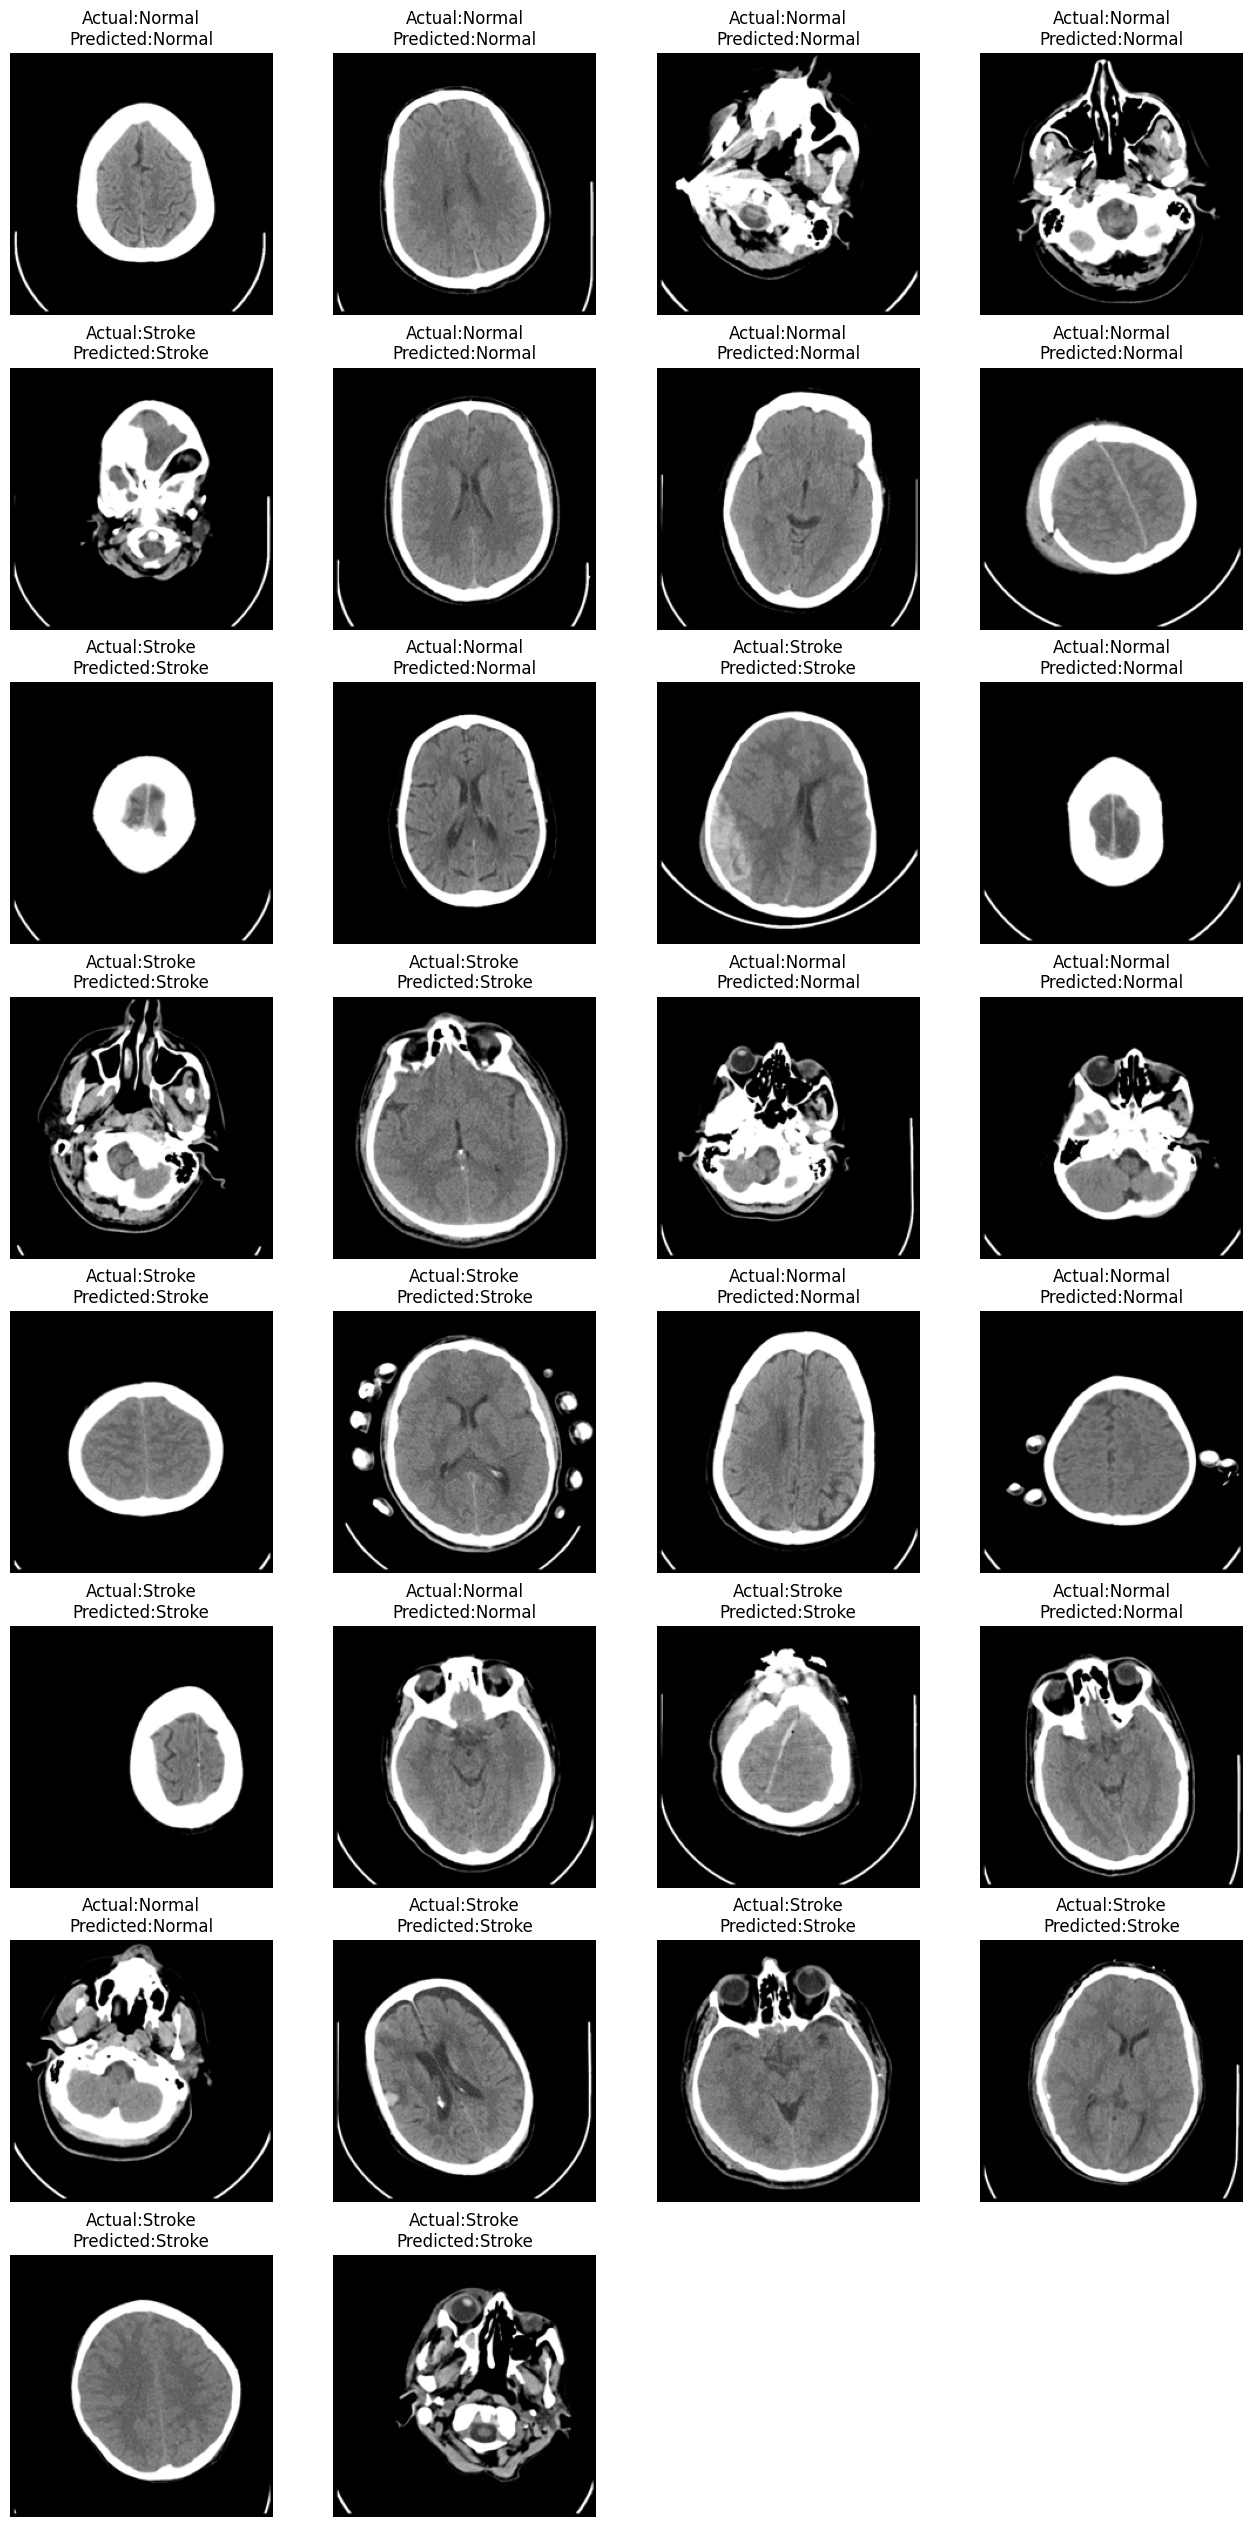

In [42]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")

## Result Using CNN :

## **Exportation du modéle**

In [50]:
model.save("model_avc.h5")

In [34]:
print(tf.__version__)


2.15.0


In [35]:
import glob
# Définir le chemin du dossier
folder_path = '/kaggle/working/*'
print(glob.glob(folder_path))

['/kaggle/working/mon_modele_test.h5']


In [ ]:
y_pred_test = model_prime.predict(x_test_s)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

In [43]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [0 0 0 0 1 0 0 0 1 0]
Predicted Label: [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


In [44]:
model.save("my_model.keras")

In [45]:
reconstructed_model = keras.models.load_model("my_model.keras")

In [47]:
# Let's check:
np.testing.assert_allclose(
    model.predict(x_test_s), reconstructed_model.predict(x_test_s)
)

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


In [49]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.weights.h5")


In [ ]:
from tensorflow.keras.models import load_model



# Ou, pour un modèle SavedModel
model = load_model('/kaggle/working/prediction_.h5')
